## DBSCAN(Density Based Spatial clustering of application with noise

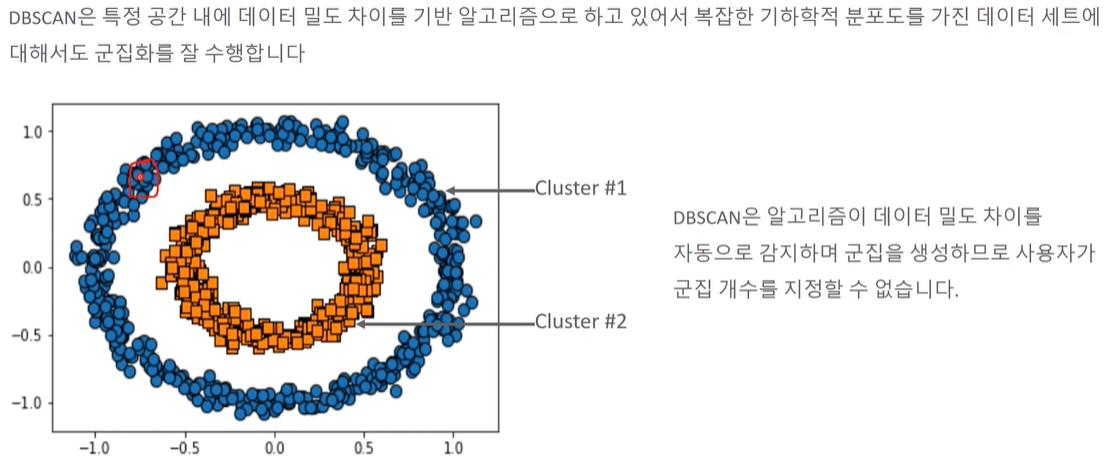

## 군집화 알고리즘별 비교
https://scikit-learn.org/stable/modules/clustering.html
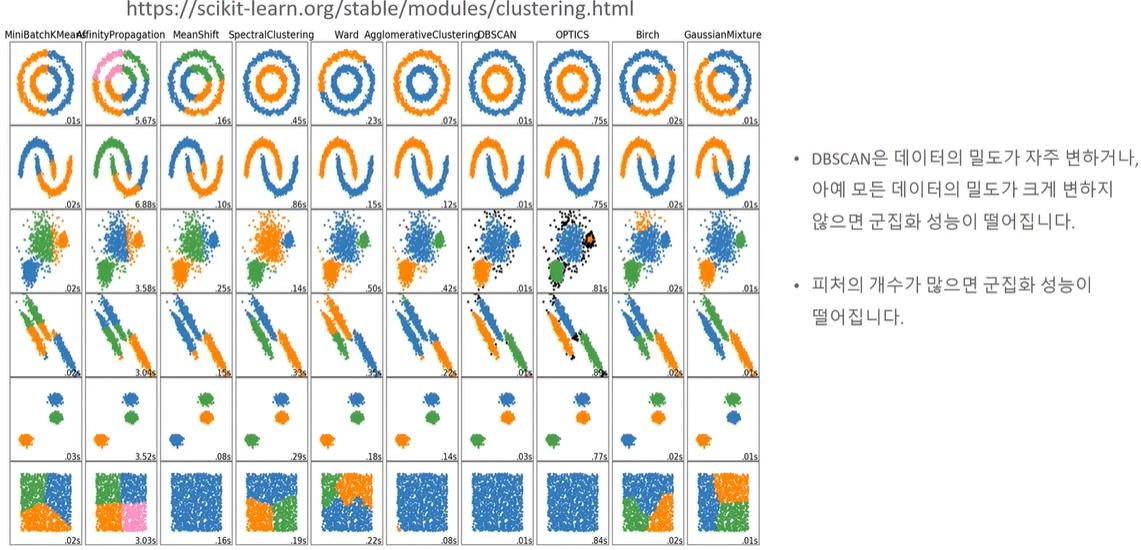

## DBSCAN 구성 요소
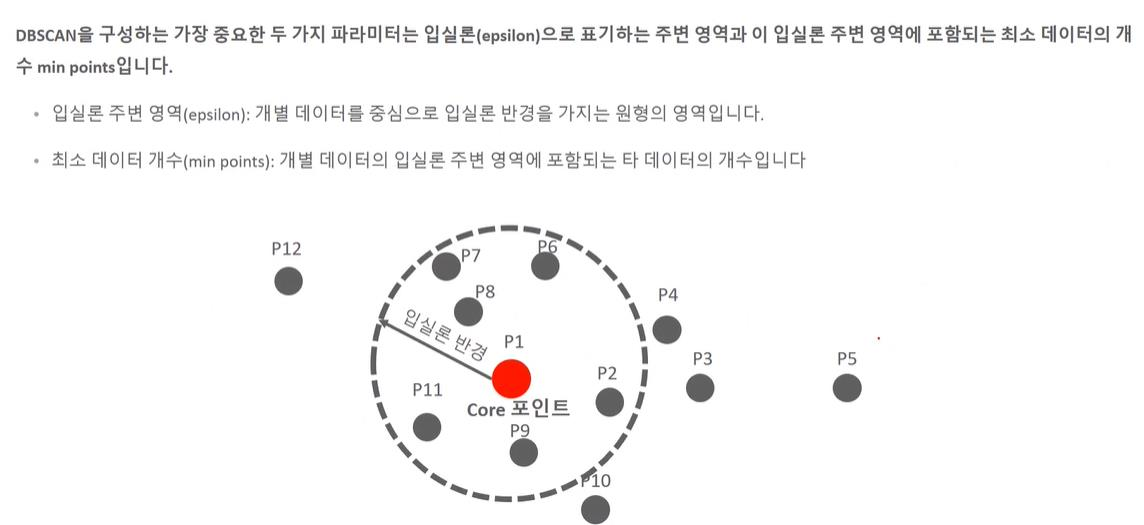


In [20]:
![image-2.png](attachment:image-2.png)

'[image-2.png]'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


### DBSCAN절차 -1
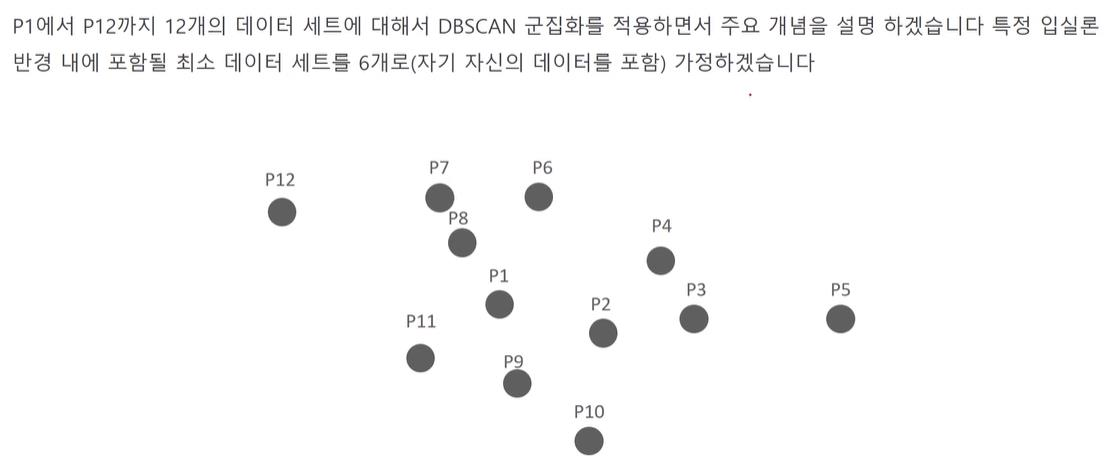


In [21]:

### DBSCAN절차 -2
![image-2.png](attachment:image-2.png)



'[image-2.png]'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [22]:

### DBSCAN절차 -3
![image-3.png](attachment:image-3.png)




'[image-3.png]'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [23]:
### DBSCAN절차 -4
![image-4.png](attachment:image-4.png)


'[image-4.png]'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [24]:

### DBSCAN절차 -5
![image-5.png](attachment:image-5.png)



'[image-5.png]'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [25]:
### DBSCAN절차 -6
![image-6.png](attachment:image-6.png)


'[image-6.png]'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:

### DBSCAN절차 -7
![image-7.png](attachment:image-7.png)

## 사이킷런 DBSCAN
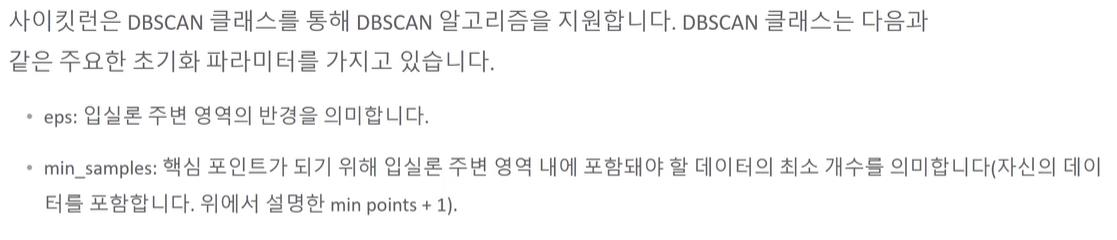

## DBSCAN 적용하기
## 01_붓꽃데이터 DBSCAN을 이용해 군집화 실행 

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris =load_iris()
irisDF =pd.DataFrame(data =iris.data, columns=['sepel_length','sepel_width','petal_lenth','petal_lenth'])

irisDF['target']= iris.target

### eps는 군집화 집단의 범위를 어디까지인지 정한다, 0.6이상의 범위에 있는 값은 노이즈로 판별한다.

In [4]:
from sklearn.cluster import DBSCAN


# eps는 군집화 집단의 범위를 어디까지인지 정한다, 0.6이상의 범위에 있는 값은 노이즈로 판별한다.
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


## 02_클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수

In [5]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

## 03_군집화 데이터__ 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환 후 visualize_cluster_plot함수에 시각화 하기
 - 함수를 사용하기 위해서 irisDF 의 ftr1 , ftr2 칼럼에 pca로 변환된 피처 데이터를 입력시킨다.

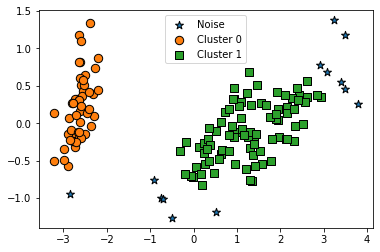

In [6]:
from sklearn.decomposition import PCA
# n_components 몇개의 값(피처)으로 만들것인가?
pca =  PCA(n_components=2 ,random_state=0)

#iris.data를 pca를 통해 두개의 값으로 바꿔준다.
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1']= pca_transformed[:,0]
irisDF['ftr2']= pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


## DBSCAN 적용하기__make_circles() 데이터 세트

## 목표__특정한 형태의 지속해서 이어지는 데이터를 kmeans 와 gmm 그리고 DBSCAN으로 실해서 비교해보자

### 1_특정한 형태의 지속해서 이어지는 데이터 만들기

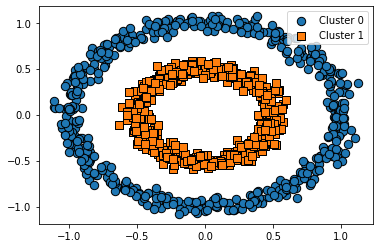

In [12]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

### 2_KMeans으로 군집화 수행

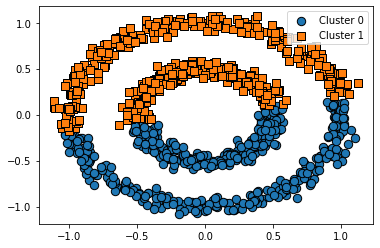

In [14]:

from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=2,max_iter=1000,random_state=0)
kmeans_label = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = kmeans_label

# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=False)

### 3_GMM으로 군집화 수행

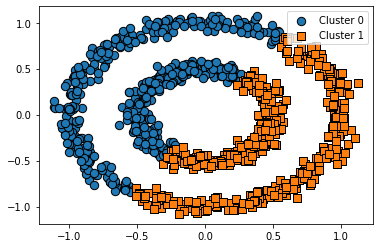

In [15]:

from sklearn.mixture import GaussianMixture
gmm =GaussianMixture(n_components=2,random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_label'] = gmm_label

# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

### 3_DBSCAN으로 군집화 수행

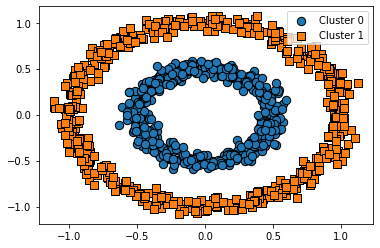

In [19]:
from sklearn.cluster import DBSCAN


# eps는 군집화 집단의 범위를 어디까지인지 정한다, 0.6이상의 범위에 있는 값은 노이즈로 판별한다.
dbscan = DBSCAN(eps=0.2, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)

clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)